In [ ]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Input,Flatten
from tensorflow.keras.models import Model

In [ ]:
data = tf.keras.datasets.cifar10
(X_train,y_train),(X_test,y_test) = data.load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
y_train = y_train.flatten()
y_test = y_test.flatten()
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
#building the model

i = Input(shape=(32,32,3))
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10,activation='softmax')(x)

model = Model(i, x)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 12s 7ms/step - loss: 1.7669 - accuracy: 0.3467 - val_loss: 1.3285 - val_accuracy: 0.5244
Epoch 2/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3074 - accuracy: 0.5271 - val_loss: 1.1654 - val_accuracy: 0.5810
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1471 - accuracy: 0.5846 - val_loss: 1.0533 - val_accuracy: 0.6294
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0635 - accuracy: 0.6212 - val_loss: 1.0265 - val_accuracy: 0.6361
Epoch 5/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9827 - accuracy: 0.6472 - val_loss: 0.9413 - val_accuracy: 0.6636
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9179 - accuracy: 0.6743 - val_loss: 0.8834 - val_accuracy: 0.6896
Epoch 7/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8522 - accuracy: 0.6966 - val_loss: 0.8813 - val_ac

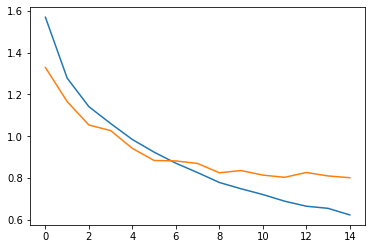

In [ ]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

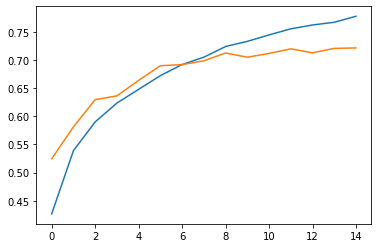

In [ ]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])

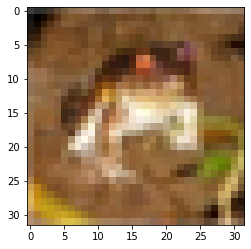

In [ ]:
plt.imshow(X_train[0])
plt.title(data.la   y_train[0])

In [ ]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

In [ ]:
pred = model.predict(X_test).argmax(axis=1)
wrong = np.where(y_test != pred)[0]

Text(0.5, 1.0, 'cat||deer')

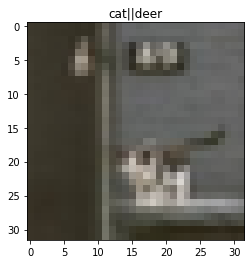

In [ ]:
img = np.random.choice(wrong)
plt.imshow(X_test[img])
plt.title(f"{labels[y_test[img]]}||{labels[pred[img]]}")
